In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bottle.csv", low_memory = False)
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df=df[['R_PRES', 'Salnty', 'T_degC']]
df.isnull().sum()

R_PRES        0
Salnty    47354
T_degC    10963
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer.fit(df)
df = imputer.transform(df)
df

array([[ 0.    , 33.44  , 10.5   ],
       [ 8.    , 33.44  , 10.46  ],
       [10.    , 33.437 , 10.46  ],
       ...,
       [ 5.    , 33.415 , 18.692 ],
       [10.    , 33.4062, 18.161 ],
       [15.    , 33.388 , 17.533 ]])

In [5]:
from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()
df = min_max_scaler.fit_transform(df)
df

array([[-0.71495074, -0.89160624, -0.07106672],
       [-0.68990821, -0.89160624, -0.0805525 ],
       [-0.68364758, -0.89828743, -0.0805525 ],
       ...,
       [-0.69929916, -0.94728287,  1.87162066],
       [-0.68364758, -0.96688104,  1.74569695],
       [-0.667996  , -1.00741363,  1.59677023]])

In [6]:
X = df[:, 0:2]
y = df[:,2]
print("X\n{}".format(X))
print("Y\n{}".format(y))

X
[[-0.71495074 -0.89160624]
 [-0.68990821 -0.89160624]
 [-0.68364758 -0.89828743]
 ...
 [-0.69929916 -0.94728287]
 [-0.68364758 -0.96688104]
 [-0.667996   -1.00741363]]
Y
[-0.07106672 -0.0805525  -0.0805525  ...  1.87162066  1.74569695
  1.59677023]


In [7]:
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (864863, 2)
Shape of y: (864863,)


In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("X_train shape:\n{}".format(X_train.shape))
print("X_test shape:\n{}".format(X_test.shape))
print("y_train shape:\n{}".format(y_train.shape))
print("y_test shape:\n{}".format(y_test.shape))

X_train shape:
(648647, 2)
X_test shape:
(216216, 2)
y_train shape:
(648647,)
y_test shape:
(216216,)


In [9]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = linreg.predict(X_test)
y_pred

array([ 0.3847997 ,  0.40089163,  0.26233048, ..., -0.36885968,
        0.46552955, -0.65312211])

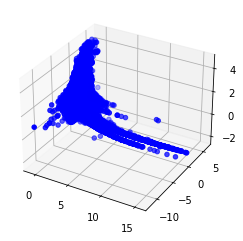

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='b', marker = "o")
plt.show()

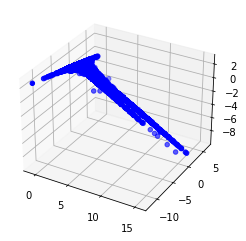

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='b', marker = "o")
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures 
polyreg = PolynomialFeatures()
X_poly = polyreg.fit_transform(X_train)
lin_reg_2 = linear_model.LinearRegression()  
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [14]:
y_predpoly = lin_reg_2.predict(polyreg.fit_transform(X_test))
y_predpoly

array([ 0.47854523,  0.57738812,  0.51149958, ..., -0.55046   ,
        0.52922009, -1.04151606])

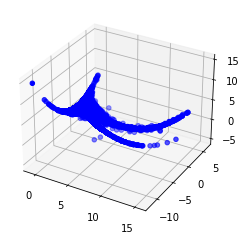

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_predpoly, c='b', marker = "o")
plt.show()

In [16]:
from sklearn.tree import DecisionTreeRegressor
DTreg = DecisionTreeRegressor()
DTreg.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
y_predDT = DTreg.predict(X_test)
y_predDT

array([ 1.28539956,  1.18896082,  1.29162461, ..., -0.88328648,
        0.62476984, -1.20238365])

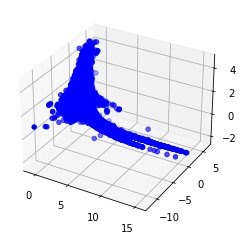

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_predDT, c='b', marker = "o")
plt.show()

In [23]:
from sklearn.tree import export_graphviz
export_graphviz(DTreg, out_file ='tree.dot',
               feature_names =['STheta','Salnty']) 

In [24]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(n_estimators = 10)
RFreg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [26]:
y_predRF = RFreg.predict(X_test)
y_predRF

array([ 1.17275595,  1.17935252,  1.27687937, ..., -0.87665037,
        0.61012419, -1.19955113])

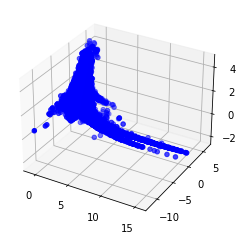

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_predRF, c='b', marker = "o")
plt.show()